In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# 1. EDA

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# First view on data

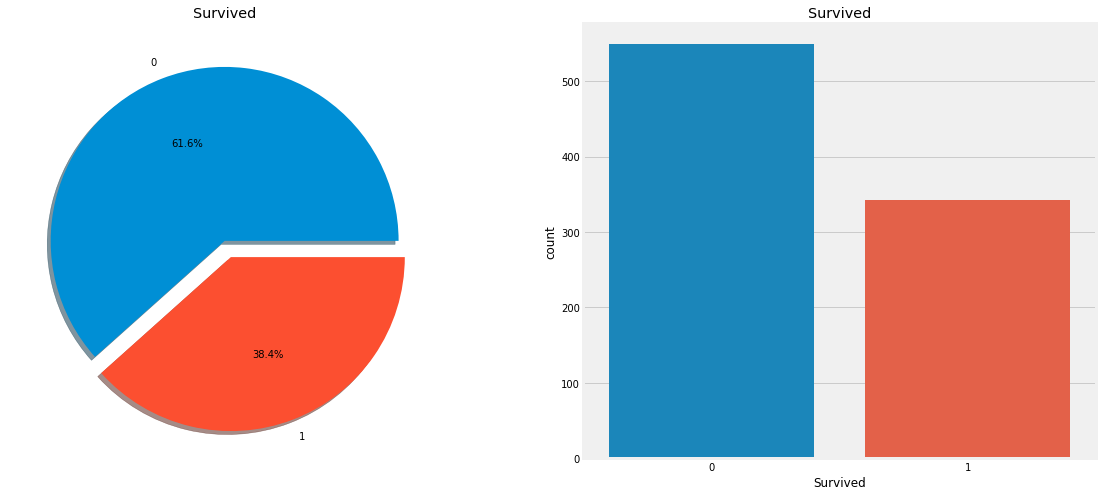

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

As we see only 38% of people survived on Titanic, so let's dive into our features and check how the influence on survive.

# Features

# Numerical features

In [12]:
# g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

**SibSip**

In [13]:
# g = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 6 , 
# palette = "muted")
# g.despine(left=True)
# g = g.set_ylabels("survival probability")

In [14]:
# pd.crosstab([train_df.SibSp],train_df.Survived, margins = True).style.background_gradient(cmap='summer_r')

In [15]:
# pd.crosstab(train_df.SibSp,train_df.Pclass,margins = True).style.background_gradient(cmap='summer_r')

From these graphs and tables of SibSip feature we can understand that people that were alone or with a lot of family members had less chance to survive than people with 1 sibling.

**Parch**

In [16]:
# g  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 6 , 
# palette = "muted")
# g.despine(left=True)
# g = g.set_ylabels("survival probability")

In [17]:
# pd.crosstab(train_df.Parch,train_df.Pclass,margins = True).style.background_gradient(cmap='summer_r')


Here we can say small families (Parch 1,2) have more chances to survive than single person (Parch 0), or medium (Parch 3,4) and large (Parch 5,6) families.

**Age**

In [18]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
# sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
# ax[0].set_title('Pclass and Age vs Survived')
# ax[0].set_yticks(range(0,110,10))
# sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
# ax[1].set_title('Sex and Age vs Survived')
# ax[1].set_yticks(range(0,110,10))
# plt.show()

As we see if you are passenger from the 1st or 2nd classes and your age is between 10 and 37 you have more chances to survive.

In [19]:
# train_df.isnull().sum()

Also we have a lot of missing ages and we need to fix it. We will fix it with mean age.

In [20]:
# train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
# train_df.isnull().sum()

**Fare**

In [21]:
# sns.histplot(x=train_df['Fare'])

In [22]:
# sns.barplot(x=train_df['Survived'],y=train_df['Fare'])


From the fare feature we can say that people that paid for ticket more (1st and 2nd classes) had more chance to survive.

# Categorical features:

**Sex**

In [23]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
# train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# ax[0].set_title('Survived vs Sex')
# sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
# ax[1].set_title('Sex:Survived vs Dead')
# plt.show()

In [24]:
# train_df.groupby(['Sex','Survived'])['Survived'].count()

As we see count of men was more than count of female , but count of survived women is grater than count of survived men. <br />
So, **feature sex is helpful for us.**

**Pclass**

In [25]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
# train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
# ax[0].set_title('Number Of Passengers By Pclass')
# ax[0].set_ylabel('Count')
# sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
# ax[1].set_title('Pclass:Survived vs Dead')
# plt.show()

In [26]:
# g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
#                    size=6, kind="bar", palette="muted")
# g.despine(left=True)
# g = g.set_ylabels("survival probability")

In [27]:
# pd.crosstab(train_df.Pclass,train_df.Survived, margins = True).style.background_gradient(cmap='summer_r')


In [28]:
# sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
# plt.show()

In [29]:
# pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass).style.background_gradient(cmap='summer_r')

As we see, there were a lot of people from the 3rd class on Titanic but the main amount of people that did not survive is of 3rd people class, at the same time num of people that survived consisted mainly of people of 1st and 2nd classes. <br />

So sum up until now:<br />
**We can say that women  and people from the 1st and 2nd classes had more chances to survive.**

**Embarked**

In [30]:
# g = sns.factorplot(x="Embarked", y="Survived",  data=train_df,
#                    size=6, kind="bar", palette="muted")
# g.despine(left=True)
# g = g.set_ylabels("survival probability")

In [31]:
# f,ax=plt.subplots(2,2,figsize=(20,15))
# sns.countplot('Embarked',data=train_df,ax=ax[0,0])
# ax[0,0].set_title('No. Of Passengers Boarded')
# sns.countplot('Embarked',hue='Sex',data=train_df,ax=ax[0,1])
# ax[0,1].set_title('Male-Female Split for Embarked')
# sns.countplot('Embarked',hue='Survived',data=train_df,ax=ax[1,0])
# ax[1,0].set_title('Embarked vs Survived')
# sns.countplot('Embarked',hue='Pclass',data=train_df,ax=ax[1,1])
# ax[1,1].set_title('Embarked vs Pclass')
# plt.subplots_adjust(wspace=0.2,hspace=0.5)
# plt.show()

In [32]:
# pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived], margins = True).style.background_gradient(cmap='summer_r')

In [33]:
# sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)
# plt.show()

A lot of people get on Titanic in S ( most of them  people from the third class).<br />
Also in port S eneter mainly amount of "reach people" from the 1st and 2nd classes.<br />
Port Q consisted mainly from people of the 3rd class.<br />
As we said before chance to survive fow woman is grater than for man and we can see it also on the last graphs.<br />
Port S is nlucky for people from the third class because chance to survive for women and men from the 3rd class is very small.<br />
Port Q is unlucky for men because most of them was from the 3rd class.

In [34]:
# train_df.isnull().sum()

As we saw before most of people most of people got on Titanic in S port. Because of itt we will enter this port in missing entries.

In [35]:
# train_df['Embarked'].fillna('S',inplace=True)
# train_df.isnull().sum()

# Feature Engineering

**Name**

In [36]:
# train_df["Name"].head()

In [37]:
# train_df["Name"].describe()

Names are unique , so let's try to organize them. And check if they have influence.

We will unite two features SibSp and Parch into one feature size_family because they have the same behaviour.

In [38]:
# Get Title from Name
# dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
# train_df["Title"] = pd.Series(dataset_title)
# train_df["Title"].head()

In [39]:
# g = sns.countplot(x="Title",data=train_df)
# g = plt.setp(g.get_xticklabels(), rotation=45)

There is a lot of titles that has same value. So let's unit them into categories.

In [40]:
# # Convert to categorical values Title 
# train_df["Title"] = train_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


In [41]:
# train_df.head()

In [42]:
# g = sns.countplot(train_df["Title"])

In [43]:
# g = sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar")
# g = g.set_ylabels("survival probability")

As we knew before women have more chances to survive, but also we found out something new, people with rare title have more chances to survive and men.

In [44]:
# # Drop Name variable
# train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [45]:
# train_df.head()

**Family size**

In [46]:
# g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

We can see that Parch and SibSp has a positive correlation and it is logically true increasing number of siblings we automatically increasing a number of parent/children,and because of it we will unit them into one feature Family size.

In [47]:
# train_df['Family_Size'] = 0
# train_df['Family_Size'] = train_df['Parch']+train_df['SibSp']

In [48]:
# train_df.head()

In [49]:
# sns.factorplot('Family_Size','Survived',data=train_df)


Like in Parch and SibSp features family_size feature has same behaviour: if you are alone or have less than 3 family members or more han 3 family memberes your chances to survive decreases.

**Cabin**

In [50]:
# train_df["Cabin"].head()

In [51]:
# train_df["Cabin"].describe()

In [52]:
# train_df["Cabin"].isnull().sum()

Let's check if cabin influences on survival rate.

In [53]:
# train_df['Survived'].groupby(train_df['Cabin'].isnull()).count()

In [54]:
# train_df.groupby(['Survived',train_df['Cabin'].isnull()])['Survived'].count()

We can see that a lot of people that did not survive have not cabine, so we will create a new feature that will get the same meaning but easier for understanding for our machine.

In [55]:
# train_df['existCabin']= np.where(train_df['Cabin'].isnull(), 0, 1)

In [56]:
# train_df.head()

In [57]:
# g = sns.factorplot(x="existCabin",y="Survived",data=train_df,kind="bar")
# g = g.set_ylabels("survival probability")

In [58]:
# pd.crosstab([train_df.existCabin],[train_df.Survived], margins = True).style.background_gradient(cmap='summer_r')

In [59]:
# # Drop Cabin variable
# train_df.drop(labels = ["Cabin"], axis = 1, inplace = True)

In [60]:
# train_df.head()

**Ticket**

In [61]:
# train_df["Ticket"].head()

In [62]:
# train_df["Ticket"].describe()

In [63]:
# train_df["Ticket"].isnull().sum()

Ticket is random string that can not help us in our task. So we will drop it

In [64]:
# # Drop Ticket variable
# train_df.drop(labels = ["Ticket"], axis = 1, inplace = True)

In [65]:
# train_df.head()

**PassengerId**

ID is unique by it's defenition so it also cannot help us. And we will drop it.

In [66]:
# # Drop Ticket variable
# train_df.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [67]:
# train_df.head()

**Converting String Values into Numeric**

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [68]:
# from sklearn.preprocessing import OneHotEncoder
# def dummy_encode(df,columns_names):
#     df_cat = df[columns_names]
#     enc = OneHotEncoder(drop='first', sparse=False)
#     df_cat_enc = pd.DataFrame(enc.fit_transform(df_cat))
#     df_enc = df.drop(columns_names, axis=1).join(df_cat_enc)
#     return df_enc
# train_df_enc = dummy_encode(train_df, ['Title','Embarked'])
# train_df_enc

In [69]:
# train_df_enc = pd.get_dummies(train_df, columns=['Title','Embarked'])
# train_df_enc

In [70]:
# train_df_enc = train_df_enc.astype({'Title_Master': 'int',
#                                     'Title_Miss': 'int',
#                                     'Title_Mlle': 'int',
#                                     'Title_Mme': 'int',
#                                     'Title_Mr': 'int',
#                                     'Title_Mrs': 'int',
#                                     'Title_Ms': 'int',
#                                     'Title_Rare': 'int',
#                                     'Embarked_C': 'int',
#                                     'Embarked_Q': 'int',
#                                     'Embarked_S': 'int'})

In [71]:
# train_df_enc.dtypes

In [72]:
# train_df_enc['Sex'].replace(['male','female'],[0,1],inplace=True)

In [73]:
# train_df_enc.head()

In [74]:
# train_df_enc.describe()

In [75]:
# train_df_enc.dtypes

In [76]:
# train_df_enc.isnull().sum()

-----------------------------------------------------------------------------------------------------------------

In [77]:
from sklearn.preprocessing import OneHotEncoder

def dummy_encode(df,columns_names,encoder=None):
    df_cat = df[columns_names]
    if encoder is None:
        encoder = OneHotEncoder(drop='first', sparse=False)
        df_cat_enc = pd.DataFrame(encoder.fit_transform(df_cat))
    else:
        df_cat_enc = pd.DataFrame(encoder.transform(df_cat))
    df_enc = df.drop(columns_names, axis=1).join(df_cat_enc)
    return df_enc, encoder


    
def modify_date(data, encoder):
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    if type == "train":
        data['Embarked'].fillna('S',inplace=True)
    
    dataset_title = [i.split(",")[1].split(".")[0].strip() for i in data["Name"]]
    data["Title"] = pd.Series(dataset_title)
    data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data["Title"] = data["Title"].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','the Countess'],
                                          ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'])
    data.drop(labels = ["Name"], axis = 1, inplace = True)
    
    data['Family_Size'] = 0
    data['Family_Size'] = data['Parch'] + data['SibSp']
    
    data['existCabin']= np.where(data['Cabin'].isnull(), 0, 1)
    data.drop(labels = ["Cabin"], axis = 1, inplace = True)
    
    data_df_enc,encoder = dummy_encode(data, ['Title','Embarked'], encoder)
    data_df_enc = pd.get_dummies(data, columns=['Title','Embarked'])

                                    
                                    
    data_df_enc['Sex'].replace(['male','female'],[0,1],inplace=True)
    
#     data_df_enc.drop(labels = ["Name"], axis = 1, inplace = True)
#     data_df_enc.drop(labels = ["Cabin"], axis = 1, inplace = True)
    data_df_enc.drop(labels = ["PassengerId","Ticket"], axis = 1, inplace = True)
    
    return data_df_enc,encoder
    
  

In [78]:
encoder = None
train_df, encoder = modify_date(train_df, encoder)
test_df, encoder = modify_date(test_df, encoder)

In [79]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,existCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,1,0,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0,1,0,0,0,0,1


In [80]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,existCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,0,0,0,1,0,0,0,1,0
1,3,1,47.0,1,0,7.0000,1,0,0,0,0,1,0,0,0,1
2,2,0,62.0,0,0,9.6875,0,0,0,0,1,0,0,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,0,0,1,0,0,0,0,1
4,3,1,22.0,1,1,12.2875,2,0,0,0,0,1,0,0,0,1


In [81]:
t = train_df['Survived']
X = train_df.drop('Survived', axis=1)
X_train, X_valid, t_train, t_valid = sklearn.model_selection.train_test_split(
    X, t, test_size=0.2, random_state=2)

In [82]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,existCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
30,1,0,40.0,0,0,27.7208,0,0,0,0,0,0,1,1,0,0
10,3,1,4.0,1,1,16.7000,2,1,0,1,0,0,0,0,0,1
873,3,0,47.0,0,0,9.0000,0,0,0,0,1,0,0,0,0,1
182,3,0,9.0,4,2,31.3875,6,0,1,0,0,0,0,0,0,1
876,3,0,20.0,0,0,9.8458,0,0,0,0,1,0,0,0,0,1


In [83]:
# Create Logistic Model
log_model = pipeline.make_pipeline(preprocessing.StandardScaler(),
                                  linear_model.LogisticRegression(max_iter=15000, random_state=0))
log_model.fit(X_train, t_train)

y_train_prob = log_model.predict_proba(X_train)
y_valid_prob = log_model.predict_proba(X_valid)


print('Accuracy score on train',log_model.score(X_train,t_train))
print('Accuracy score on validation',log_model.score(X_valid,t_valid))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on valid', metrics.log_loss(t_valid, y_valid_prob))

Accuracy score on train 0.8441011235955056
Accuracy score on validation 0.7988826815642458

CE on train 0.3873181098938312
CE on valid 0.4891989733532329


In [84]:
# MLP Model
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(
    activation='logistic',
     solver='sgd', alpha=0, max_iter=20000
     ).fit(X_train, t_train)

y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_valid)

print('Accuracy score on train',
      MLP_cls.score(X_train, t_train))
print('Accuracy score on test',
      MLP_cls.score(X_valid, t_valid))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test',
      metrics.log_loss(t_valid, y_valid_prob))

Accuracy score on train 0.6896067415730337
Accuracy score on test 0.664804469273743

CE on train 0.5801890048533729
CE on test 0.4891989733532329


In [85]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,existCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,0,0,0,1,0,0,0,1,0
1,3,1,47.0,1,0,7.0000,1,0,0,0,0,1,0,0,0,1
2,2,0,62.0,0,0,9.6875,0,0,0,0,1,0,0,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,0,0,1,0,0,0,0,1
4,3,1,22.0,1,1,12.2875,2,0,0,0,0,1,0,0,0,1


In [86]:
# Checking Model on The Test Data
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv") # Reading the test file

# X_test = change_test(titanic_test)

X_test = test_df

X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

# print(f"X_train.shape = {X_train.shape}")
# print(f"X_test.shape = {X_test.shape}")
# print(f"X_train.columns = {X_train.columns}")
# print(f"X_test.columns = {X_test.columns}")

# X_test.head()

label_test = pd.DataFrame({"Survived":MLP_cls.predict(X_test)})
label_test.Survived

results = pd.DataFrame({"PassengerId": titanic_test.PassengerId, 'Survived': label_test.Survived})
results = results.astype({'PassengerId': 'int32'})
results.to_csv('submission.csv', index = False)

print(results)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
